pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
importing Jupyter notebook from i_creation_environnement.ipynb


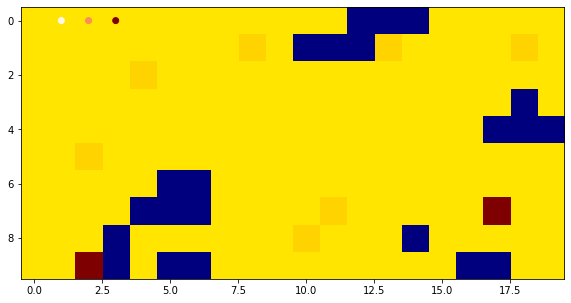

In [1]:
import pygame
import numpy as np
import os
import import_ipynb
import i_creation_environnement
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Mouse :

    def __init__(self):
        self.pos_x = 0
        self.pos_y = 0
        self.rewards = []

In [3]:
agent = Mouse()
env = i_creation_environnement.AugmentedGridworldEnv()

In [4]:
size_case = 30
nb_x_cases = env.shape[0]
nb_y_cases = env.shape[1]

w_height = size_case * nb_x_cases
w_width = size_case * nb_y_cases + 200

pygame.init()

win = pygame.display.set_mode((w_width, w_height))
Scores = [-1000]

pygame.font.init() # you have to call this at the start, 
                   # if you want to use this module.
myfont = pygame.font.SysFont('Comic Sans MS', 30)



def new_game():
    env.reset()
    global score
    score = 0
    global obs
    obs = []
    global reward_matrix
    global score_i
    score_i = 0
    reward_matrix = - np.ones(env.shape)
    reward_matrix[env._cliff] = -100
    reward_matrix[env._carrots] = 3
    reward_matrix[env._cheese] = 50
    
    agent.pos_x = size_case//2;
    agent.pos_y = size_case//2;


    
    
new_game()
run = True

while run:
    pygame.time.delay(100)

    for event in pygame.event.get():

        if event.type == pygame.QUIT:
            run = False
        
        if event.type == pygame.KEYDOWN:

            if event.key == pygame.K_UP:
                if agent.pos_y>size_case//2:
                    new_y = agent.pos_y - size_case
                    new_x = agent.pos_x

            if event.key == pygame.K_DOWN:
                if agent.pos_y<w_height - size_case//2:
                    new_y = agent.pos_y + size_case
                    new_x = agent.pos_x

            if event.key == pygame.K_LEFT:
                if agent.pos_x>size_case//2:
                    new_x = agent.pos_x - size_case
                    new_y = agent.pos_y

            if event.key == pygame.K_RIGHT:
                if agent.pos_x<w_width-200 - size_case//2:
                    new_x = agent.pos_x + size_case
                    new_y = agent.pos_y
                    
            if env._walls[new_y//size_case, new_x//size_case]==True:
                (new_x, new_y) = (agent.pos_x, agent.pos_y)
                
            if env._winds[new_y//size_case, new_x//size_case]==True:
                new_x = new_x + size_case
                obs.append((agent.pos_x, agent.pos_y))
            
            (agent.pos_x, agent.pos_y) = (new_x, new_y)
            
            score_i = reward_matrix[agent.pos_y//size_case, agent.pos_x//size_case]
            score += score_i
            
            if (agent.pos_x, agent.pos_y) not in obs : 
                        obs.append((agent.pos_x, agent.pos_y))
                    
            if abs(reward_matrix[agent.pos_y//size_case, agent.pos_x//size_case])>45:
                Scores.append(score)
                print(score)
                new_game()
            
            if env._carrots[agent.pos_y//size_case, agent.pos_x//size_case]==True:
                env._carrots[agent.pos_y//size_case, agent.pos_x//size_case]==False
                reward_matrix[agent.pos_y//size_case, agent.pos_x//size_case] = -1;
              
                
    win.fill((0,0,0))
    textsurface = myfont.render('Reward : %d'%score_i, False, (150, 120, 0))
    win.blit(textsurface,(w_width - 180,0))
    textsurface2 = myfont.render('Score : %d'%score, False, (150, 120, 0))
    win.blit(textsurface2,(w_width - 180,50))
    dd = max(Scores)
    textsurface3 = myfont.render('Max : %d'%dd, False, (150, 120, 0))
    win.blit(textsurface3,(w_width - 180,100))
    
    for a in obs : 
        pygame.draw.rect(win, (13,188,123), (a[0] - size_case//2, a[1] - size_case//2, size_case, size_case), 20)
    pygame.draw.circle(win, (0,10,210), (agent.pos_x, agent.pos_y), 10)
    
    #agent_rect = pygame.Rect(agent.pos_x, agent.pos_y, agent.pos_x + 10, agent.pos_y+10)
    #pygame.draw.rect(win, (23, 125, 210), agent_rect) 

    pygame.display.update()

pygame.quit()
print(Scores)

34.0
42.0
42.0
[-1000, 34.0, 42.0, 42.0]


In [5]:
print(Scores)

[-1000, 34.0, 42.0, 42.0]
